In [4]:
import pandas as pd
from src.data.dataset import GlossSeq2PolishDataset
import seaborn as sns
from matplotlib import pyplot as plt
from src.settings import GLOSS_SPECIAL_SYMBOLS

In [5]:
dataset = GlossSeq2PolishDataset()

In [6]:
gloss_annotations = (dto for record in dataset for dto in record.gloss_sequence)
gloss_df = pd.DataFrame.from_records(map(lambda dto: dto.model_dump(), gloss_annotations))
gloss_df

,start,end,text,doc_filepath,video_filename,task_label,dominant_hand
0,39040,39440,MYŚLEĆ 2.1 P:Z;L:Z (NA PRZEMIAN),/15/K66BF13-26_15_15_signsNO.eaf,K66BF13-26.mp4,15,True
1,39440,39640,JAK 1.2 P:I;L:Ø,/15/K66BF13-26_15_15_signsNO.eaf,K66BF13-26.mp4,15,True
2,39640,39920,POMYSŁ 1.3 P:AZ;L:Ø,/15/K66BF13-26_15_15_signsNO.eaf,K66BF13-26.mp4,15,True
3,39920,40200,WSKAZ-JA 1.1 P:L;L;Ø (Z WIDOCZNYM KCIUKIEM),/15/K66BF13-26_15_15_signsNO.eaf,K66BF13-26.mp4,15,True
4,40200,41120,MOŻNA 1.1 P:B;L:B (MOŻE/MOŻLIWE),/15/K66BF13-26_15_15_signsNO.eaf,K66BF13-26.mp4,15,True
...,...,...,...,...,...,...,...
242110,353480,354480,NIEDŹWIEDŹ/MIŚ 1.2 P:B;L:Ø,/13/K17BF13-26_13_13_comics.eaf,K17BF13-26.mp4,13,True
242111,354680,356440,PRZESTRASZYĆ 1.1 P:5A;L:5A (JAK ZŁAPAĆ),/13/K17BF13-26_13_13_comics.eaf,K17BF13-26.mp4,13,True
242112,359240,360120,BIUSTONOSZ 1.2. P:5;L:5 (STANIK/STRÓJ KĄPIELOWY),/13/K17BF13-26_13_13_comics.eaf,K17BF13-26.mp4,13,True
242113,360120,360960,DZIECKO 2.2 P:I1;LØ,/13/K17BF13-26_13_13_comics.eaf,K17BF13-26.mp4,13,True


In [8]:
gloss_seq_in_corresponding_polish = [len(record.gloss_sequence) for record in dataset]
print(f"Mean number of gloss annotations for corresponding Polish annotation: {sum(gloss_seq_in_corresponding_polish) / len(gloss_seq_in_corresponding_polish):.4f}")

Mean number of gloss annotations for corresponding Polish annotation: 6.1105


In [4]:
gloss_ann_counts = gloss_df["text"].value_counts()
gloss_ann_counts

text
WSKAZ: Z WSZYSTKIE KIERUNKI                                             6542
%                                                                       5611
WSKAZ: L WSZYSTKIE KIERUNKI                                             2630
WSKAZ: Z (WSZYSTKIE KIERUNKI/STRZELAĆ/JEŹDZIĆ/WŁAŚNIE/TO/W-TYM-ROKU)    2233
^ -OZNACZA PAUZĘ W MIGANIU                                              2233
                                                                        ... 
RYNEK 1.2 P:G|;L:B (KOŁO) OK                                               1
RUDY 1.1 P:A;L:A                                                           1
STUDIA/STUDIOWAĆ 2.1 P:O;L:A                                               1
$:KL: V+V (KAMERA/WYŚWIETLAĆ)                                              1
$:KL: H (PTAK NA ŚCIANIE/NA GÓRZE)? DL>MG                                  1
Name: count, Length: 7615, dtype: int64

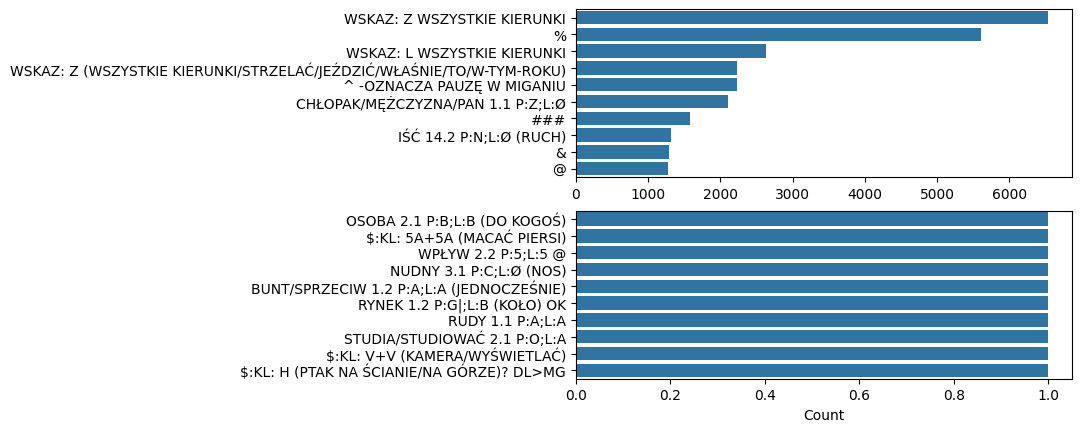

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=1)
ax1, ax2 = axes.flatten()
sns.barplot(
    # least common 10 `gloss` annotations
    data=gloss_ann_counts[:10],
    orient="h",
    ax=ax1
)
sns.barplot(
    # most common 10 `gloss` annotations
    data=gloss_ann_counts[-10:],
    orient="h",
    ax=ax2,
)
ax1.set(ylabel=None)
ax1.set(xlabel=None)
ax2.set(ylabel=None)
plt.xlabel("Count")
plt.show()

## Special symbols used in the annotation of the PJM Corpus

In [6]:
gloss_ann_counts[gloss_ann_counts.index.isin(GLOSS_SPECIAL_SYMBOLS)]

text
%      5611
###    1586
&      1291
@      1269
Name: count, dtype: int64

In [7]:
# ###, ^, %, &, @
gloss_ann_counts[
    gloss_ann_counts.index.str.contains("###", regex=False)
    | gloss_ann_counts.index.str.contains("^", regex=False)
    | gloss_ann_counts.index.str.contains("%", regex=False)
    | gloss_ann_counts.index.str.contains("&", regex=False)
    | gloss_ann_counts.index.str.contains("@", regex=False)
]

text
%                                       5611
^ -OZNACZA PAUZĘ W MIGANIU              2233
###                                     1586
&                                       1291
@                                       1269
AKURAT 1.5 P:O;L:B @                     369
MOŻNA & 1.4 P:B;L:Ø (MOŻE/MOŻLIWE)        82
G: B+B (DOBRA &)                          65
MOŻNA & 1.2 P:B;L:B  (MOŻE/MOŻLIWE)       64
NIE*MIEĆ (= %) 1.4 P:B;L:B                58
NIE*MIEĆ (= %) 1.3 P:B;L:Ø (WZÓR: %)       8
SKAKAĆ 1.7 P:H;L:B @                       8
SOWA 1.1 P:O;L:O @                         7
NASTĘPNY 2.7 P:B;L:B@ (PRZÓD)              6
ALE 1.6 P:L;:LB @                          5
DLA 1.4 P:Z;L:B @                          3
Q: O+O (NA 100%)                           3
ZGADZAĆ-SIĘ 3.3 P:B;L:B@                   2
PIĘTNAŚCIE 1.4 P:5;L;5@                    2
STAĆ 3.2 P:V;L:B@                          2
PŁOT 1.12 P:4;L:Ø @ (PIOZOMO)              1
POWTÓRZYĆ/POWTARZAĆ 1.3 P:5E;L:B @         1
RUCH/

## Abbreviations for marking additional types of glosses

In [8]:
gloss_ann_counts[gloss_ann_counts.index.str.contains("IDENTYF:", regex=False)]

text
IDENTYF: (CHARLIE CHAPLIN)+WĄS-PIONOWO                    152
IDENTYF: (CHARLIE CHAPLIN)+WĄS+KSZTAŁT-C                  139
IDENTYF: (CHARLIE CHAPLIN)+KIJ                             87
IDENTYF: (CHARLIE CHAPLIN)+NOGI/CHÓD CHARAKTERYSTYCZNY     44
IDENTYF: (CHARLIE CHAPLIN)+WĄS-POZIOMO                     16
IDENTYF: (CHARLIE CHAPLIN) WĄS+KIJ                         14
IDENTYF: (CHARLIE CHAPLIN)+WĄS+DRAPAĆ+POD+NOSEM             8
IDENTYF: (NIEMCY)                                           7
IDENTYF: (CHARLIE CHAPLIN)+KIJ+WĄS                          5
IDENTYF: (MAJ)                                              5
IDENTYF: (BLOK)                                             4
IDENTYF: (DWIE-DŁONIE - FIRMA W ŁODZI)                      2
IDENTYF: (CYBULSKI)                                         2
IDENTYF: (KOPEĆ)                                            2
IDENTYF: (LUDMIŁA WITT 1)                                   2
IDENTYF: (MARIA TARNAWSKA)                                  1
IDE

In [9]:
gloss_ann_counts[gloss_ann_counts.index.str.contains("$:KL:", regex=False)]

text
$:KL: N LUB Z (IŚĆ/LATAĆ/SIEDZIEĆ W RÓŻNYCH KIERUNKACH)      361
$:KL: B+B (KULA/AUTYZM/AKWARIUM/MISKA/DONICZKA)              200
$:KL: A+A (GRAĆ/BĘBEN)                                       172
$:KL: 5+5 (DUŻA KULA)                                        168
$:KL: A+A (DREZYNA/POCIĄG/TOR)                               167
                                                            ... 
$:KL: CC+CC (TWARZ/PLAMA/KOLOR/KOLORY+ZWIERZĘTA/ZWIERZĄT)      1
$:KL: B+B (URODZINY+DMUCHAĆ+TORT)                              1
$:KL: 5A+5A (MACAĆ PIERSI)                                     1
$:KL: V+V (KAMERA/WYŚWIETLAĆ)                                  1
$:KL: H (PTAK NA ŚCIANIE/NA GÓRZE)? DL>MG                      1
Name: count, Length: 1326, dtype: int64

In [10]:
gloss_ann_counts[gloss_ann_counts.index.str.contains("WSKAZ:", regex=False)]

text
WSKAZ: Z WSZYSTKIE KIERUNKI                                             6542
WSKAZ: L WSZYSTKIE KIERUNKI                                             2630
WSKAZ: Z (WSZYSTKIE KIERUNKI/STRZELAĆ/JEŹDZIĆ/WŁAŚNIE/TO/W-TYM-ROKU)    2233
WSKAZ: Z+Z WSZYSTKIE KIERUNKI                                           1230
WSKAZ: B (JA)                                                           1219
                                                                        ... 
WSKAZ: L (UCHO)                                                            1
WSKAZ: 5 (WY/ONI)                                                          1
WSKAZ: B (UCHO)                                                            1
WSKAZ: Z+Z (BRZUCH)                                                        1
WSKAZ: GEST                                                                1
Name: count, Length: 106, dtype: int64

In [11]:
gloss_ann_counts[gloss_ann_counts.index.str.contains("G:", regex=False)]

text
G: 5 (PRZEBIERANIE PALCAMI)                                          103
G: B/5 (DOBRZE/DOBRA)                                                 85
G: RĘCE+(SUPER-CIESZYĆ-RĘCE) P:B;L:B (PANTOMIMA)(POCIERANIE RĘCE)     68
G: B+B (DOBRA &)                                                      65
G: RĘCE+RÓŻNIE P:B;L:B (PANTOMIMA)                                    45
                                                                    ... 
G: A (RĘCE NA BIODRZE)                                                 1
G: B+B (NIC NIE ROBIĆ)                                                 1
G: A (SIEDZIEĆ)                                                        1
G: A+A (ZAKASAĆ RĘKAWY/WZIĄĆ SIĘ DO ROBOTY)                            1
G: B+B (PODPIERAĆ GŁOWĘ)                                               1
Name: count, Length: 113, dtype: int64